In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Örnek Veri Seti Oluşturalım.
np.random.seed(42)

X = np.random.rand(100, 3) # 3 özellik içeren 100 gözlem
y = 2 * X[:, 0] + 3 * X[:, 1] + 4 * X[:, 2] + np.random.randn(100) # Hedeflenen değerler

# Veri setini DataFrame 'e dönüştürelim.
data = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Feature3'])
data['Target'] = y

data.head()

,Feature1,Feature2,Feature3,Target
0,0.374540,0.950714,0.731994,6.574771
1,0.598658,0.156019,0.155995,1.637751
2,0.058084,0.866176,0.601115,7.263100
3,0.708073,0.020584,0.969910,5.991457
4,0.832443,0.212339,0.181825,1.004060


# Veri Analizi

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Feature1,100.0,0.476849,0.285957,0.005522,0.238589,0.472761,0.713109,0.990054
Feature2,100.0,0.512461,0.310219,0.005062,0.253347,0.520517,0.781201,0.985650
Feature3,100.0,0.496303,0.288114,0.006952,0.237540,0.522412,0.712545,0.969910
Target,100.0,4.546123,1.933652,0.817340,3.267249,4.298251,5.998103,9.227577


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  100 non-null    float64
 1   Feature2  100 non-null    float64
 2   Feature3  100 non-null    float64
 3   Target    100 non-null    float64
dtypes: float64(4)
memory usage: 3.2 KB


In [5]:
data.corr()

,Feature1,Feature2,Feature3,Target
Feature1,1.000000,0.053330,-0.089317,0.300375
Feature2,0.053330,1.000000,-0.014830,0.463852
Feature3,-0.089317,-0.014830,1.000000,0.644139
Target,0.300375,0.463852,0.644139,1.000000


In [6]:
data.var()

Feature1    0.081771
Feature2    0.096236
Feature3    0.083010
Target      3.739008
dtype: float64

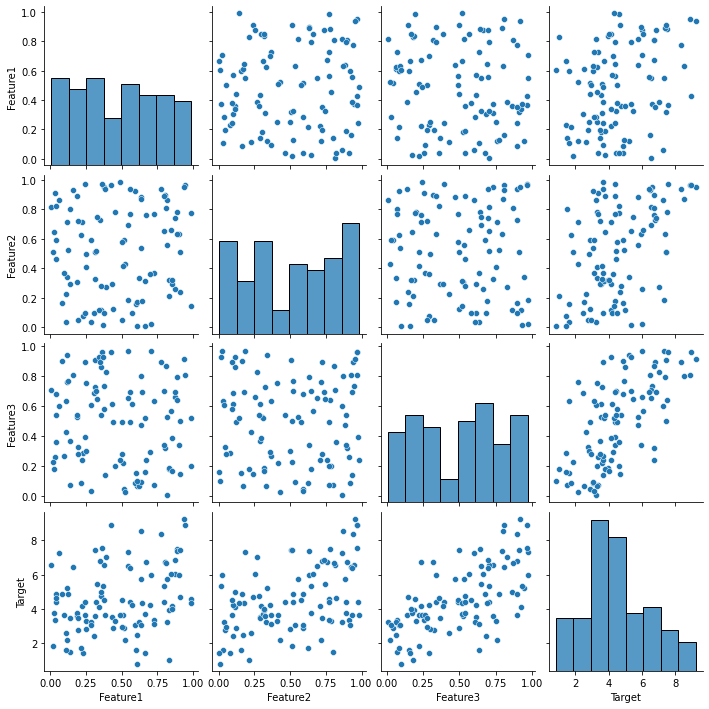

In [7]:
sns.pairplot(data=data);
plt.show()

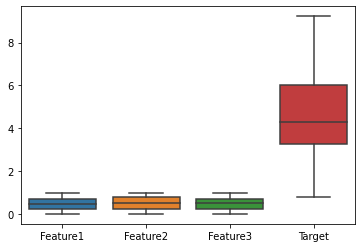

In [8]:
sns.boxplot(data=data);
plt.show()

In [9]:
# Eksik gözlemleri inceleyelim.
data.isnull().any()

Feature1    False
Feature2    False
Feature3    False
Target      False
dtype: bool

# Verileri Standartlaştıralım.

In [10]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

scaled_data = pd.DataFrame(scaled_X, columns=['Feature1', 'Feature2', 'Feature3'])
scaled_data['Target'] = y
scaled_data.head()

,Feature1,Feature2,Feature3,Target
0,-0.359580,1.419838,0.822168,6.574771
1,0.428116,-1.154792,-1.187110,1.637751
2,-1.471813,1.145954,0.365619,7.263100
3,0.812668,-1.593567,1.652098,5.991457
4,1.249785,-0.972327,-1.097005,1.004060


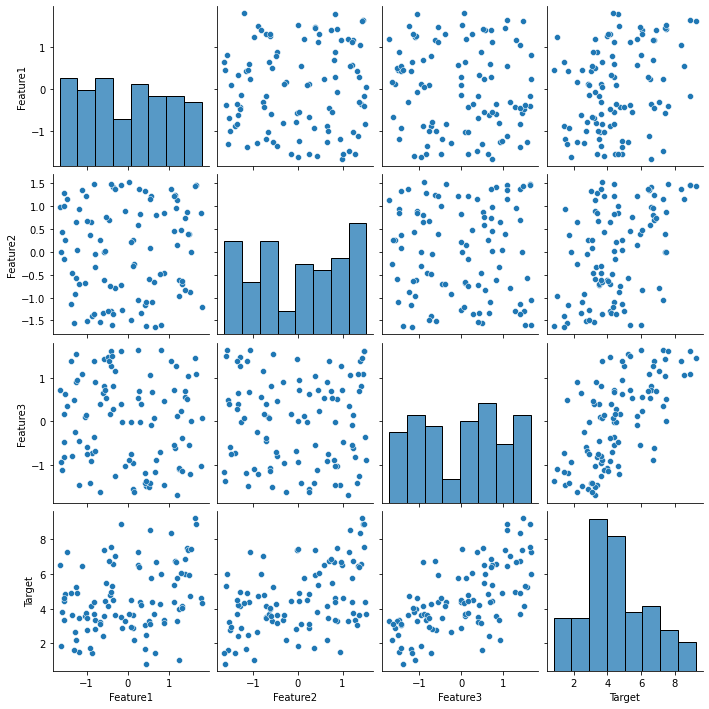

In [11]:
sns.pairplot(data=scaled_data);

# Model İşlemleri

In [12]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

In [13]:
model = MLPRegressor().fit(X_train, y_train)

C:\Users\murat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Modelin Bilgilerine Erişelim.

In [14]:
model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

# Modeli Değerlendirelim

In [15]:
# Tahmin
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE: ', mse)
print('R^2: ', r2)

MSE:  1.838977522489709
R^2:  0.6103349489440532


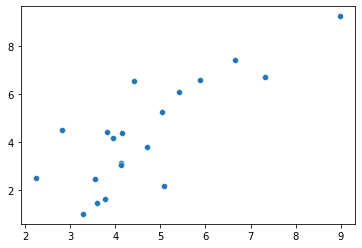

In [16]:
sns.scatterplot(x=y_pred, y=y_test);

# Model Tuning İşlemi

In [17]:
warnings.filterwarnings('ignore')

In [21]:
params = {
    'hidden_layer_sizes':[(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [200, 1000, 2000]
}

grid = GridSearchCV(estimator=model, param_grid=params, cv=5)
grid.fit(X_train, y_train)

print('Best Parameters: ', grid.best_params_)
print('Best Score: ', grid.best_score_)
best_model = grid.best_estimator_

Best Parameters:  {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50,), 'max_iter': 2000, 'solver': 'sgd'}
Best Score:  0.7511038405124979


In [26]:
scores = cross_val_score(best_model, scaled_X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print('RMSE Scores: ', rmse_scores)

RMSE Scores:  [1.09181456 1.36093968 1.04467893 0.95470891 0.92063059]


# Model Tuning Sonrası Hiperparametreleri Kullanarak Tekrar Model Oluşturalım.

In [27]:
model = MLPRegressor(activation='relu', alpha=0.01, hidden_layer_sizes=(50,), max_iter=2000, solver='sgd')
model.fit(X_train, y_train)

MLPRegressor(alpha=0.01, hidden_layer_sizes=(50,), max_iter=2000, solver='sgd')

In [28]:
y_pred = model.predict(X_test)

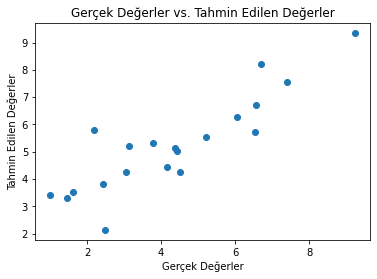

In [35]:
plt.scatter(y_test, y_pred)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek Değerler vs. Tahmin Edilen Değerler')
plt.show()

In [39]:
inputt = np.array([[0.3, 0.4, 0.8]])

scaled_observation = scaler.transform(inputt)
prediction = best_model.predict(scaled_observation)
print('Tahmin: ', float(prediction))

Tahmin:  5.117893860001062


In [44]:
y_pred.size

20

In [45]:
y_test.size

20

In [48]:
test = pd.DataFrame({
    'Gerçek Değerler': y_test,
    'Tahmin Değerleri': y_pred
})

test.head(8)

,Gerçek Değerler,Tahmin Değerleri
0,4.150760,4.440307
1,3.136918,5.209765
2,6.528292,5.705411
3,4.414637,5.025005
4,5.223275,5.537930
5,3.772324,5.334066
6,1.467272,3.286668
7,9.227577,9.359237
